# **Dean Loeafoe Quiz 4**
## **EDA and Logistic Regression of Banking Data**
### **Part 1 Introduction**
The banking industry in the USA is highly regulated. Banks are required to adhere to strict guidelines regarding the
management of customer deposits, the maintaining of customer privacy, and the avoidance of discrimination when
approving or rejecting loan applications. Many years ago, banks engaged in the practice of “redlining” when approving
loans for home mortgages, which basically amounted to the automatic rejection of loan applications for homes located
in certain areas that were deemed by banks to be overly prone to loan defaults. When such practices were deemed to
be discriminatory by bank regulators, banks adjusted their mortgage lending practices in an attempt to make them more
objective. However, regulators remain concerned that discrimination can exist even when what appear to be purely
objective criteria are used for purposes of deciding whether or not a customer is approved for a loan.

**Statement of Problem**
* The task is to develop a model that can predict whether or not a given mortgage loan application is likely to be approved or denied. The regulator plans to use the output of such a model in an attempt
to identify potential instances of discrimination in the lending practices of the banks for which it is tasked with
regulating.

### Part 2: Data **Summary**
The data set you will be using is sourced from the Federal Reserve Bank of Boston. The data set comprises 2,381 observations of 1 response/dependent variable (which indicates whether or not a mortgage application was denied) and 12 explanatory/independent variables.

*dir - debt payments to total income ratio

*hir - housing expenses to income ratio

*lvr - ratio of size of loan to assessed value of property

*ccs - consumer credit score from 1 to 6 (a low value being a good score)

*mcs - mortgage credit score from 1 to 4 (a low value being a good score)

*pbcr - public bad credit record ?

*dmi - denied mortgage insurance ?

*self - self employed ?

*single - is the applicant single ?

*uria - 1989 Massachusetts unemployment rate in the applicant's industry

*condominium - is unit a condominium ? (was called comdominiom in version 0.2-9 and earlier versions of the package)

*black - is the applicant black ?

*deny - mortgage application denied ?

In [130]:
#Initialize data
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (model_selection,preprocessing)
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://raw.githubusercontent.com/espio11/Data-Analytics-Summer-2022/main/HDMA%20Boston%20Housing%20Data", sep = ",")
del df['Unnamed: 0'] #Deleted unnecessary column that held a row count
df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [131]:
#I did this to ensure the ensure I grabbed the entire file
df.tail()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
2376,0.300000,0.300000,0.777049,1.000000,2.000000,no,no,no,yes,3.200000,1,no,no
2377,0.260000,0.200000,0.526761,2.000000,1.000000,no,no,no,no,3.100000,0,no,no
2378,0.320000,0.260000,0.753846,6.000000,1.000000,yes,no,no,yes,3.100000,1,yes,yes
2379,0.350000,0.260000,0.813559,2.000000,2.000000,no,no,no,yes,4.300000,1,no,yes
2380,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,0,no,no


In [132]:
#Checking the shape to make sure all columns and rows are included
print(df.shape)

(2381, 13)


In [133]:
#Change categorical data to numeric so it can be quantified appropirately
df['pbcr'].replace(['no', 'yes'], [0, 1], inplace=True)
df['dmi'].replace(['no', 'yes'], [0, 1], inplace=True)
df['self'].replace(['no', 'yes'], [0, 1], inplace=True)
df['single'].replace(['no', 'yes'], [0, 1], inplace=True)
df['black'].replace(['no', 'yes'], [0, 1], inplace=True)
df['deny'].replace(['no', 'yes'], [0, 1], inplace=True)

In [134]:
#Checking to see the conversion of categorical data
df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221,0.221,0.800000,5.0,2.0,0.0,0,0.0,0,3.9,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,0.0,0,0.0,1,3.2,0,0,0
2,0.372,0.248,0.920398,1.0,2.0,0.0,0,0.0,0,3.2,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,0.0,0,0.0,0,4.3,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,0.0,0,0.0,0,3.2,0,0,0


In [135]:
#Checking the data type and non-null count of each column
df.info()
#non-null objects need to be handled in pbcr and self columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dir          2381 non-null   float64
 1   hir          2381 non-null   float64
 2   lvr          2381 non-null   float64
 3   ccs          2381 non-null   float64
 4   mcs          2381 non-null   float64
 5   pbcr         2380 non-null   float64
 6   dmi          2381 non-null   int64  
 7   self         2380 non-null   float64
 8   single       2381 non-null   int64  
 9   uria         2381 non-null   float64
 10  comdominiom  2381 non-null   int64  
 11  black        2381 non-null   int64  
 12  deny         2381 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 241.9 KB


## **Part 3: Data preparation**
In this section, I will search for and handle any values that are unexpected or do not provide information to the data set. Usually, I would also handle outliers in this section. I will not do so in this case. The reason for this is because I want my model to somewhat be able to draw a meaningful conslusion for an individual with an unusual set of attributes. Leaving in the outliers will aid in this goal.

In [136]:
#Checking for any odd values such as unwanted negative numbers or zeroes
df.min() 

dir            0.00
hir            0.00
lvr            0.02
ccs            1.00
mcs            1.00
pbcr           0.00
dmi            0.00
self           0.00
single         0.00
uria           1.80
comdominiom    0.00
black          0.00
deny           0.00
dtype: float64

In [137]:
#Print unique values and check column for ?
temp =  df['dir'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[0.221      0.265      0.37200001 0.32       0.36       0.24
 0.35       0.28       0.31       0.18       0.23       0.37
 0.39       0.33       0.3        0.26       0.34       0.38
 0.44       0.41       0.29       0.27       0.16       0.314
 0.33200001 0.39900001 0.34200001 0.37599998 0.32099998 0.279
 0.31700001 0.285      0.365      0.33700001 0.35200001 0.34400001
 0.37799999 0.25799999 0.21799999 0.27200001 0.35900002 0.39700001
 0.219      0.38799999 0.25       0.31200001 0.35799999 0.61
 0.26299999 0.26200001 0.46       0.305      0.38400001 0.264
 0.47       0.19       0.38200001 0.325      0.39799999 0.395
 0.40700001 0.301      0.266      0.26799999 0.269      0.40900001
 0.30799999 0.311      0.32799999 0.38380001 0.33799999 0.281
 0.3923     0.36299999 0.2458     0.38209999 0.286      0.315
 0.30469999 0.36599999 0.37099998 0.38099998 0.26520001 0.35700001
 0.43       0.4        0.40599999 0.73       0.38299999 0.29299999
 0.24030001 0.194      0.294      0.3798     0.33

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [138]:
#Print unique values and check column for ?
temp =  df['hir'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[2.21000004e-01 2.65000000e-01 2.47999992e-01 2.50000000e-01
 3.50000000e-01 1.70000000e-01 2.90000000e-01 2.20000000e-01
 2.40000000e-01 2.70000000e-01 3.00000000e-01 3.40000000e-01
 1.50000000e-01 2.80000000e-01 3.10000000e-01 3.20000000e-01
 3.30000000e-01 1.30000000e-01 2.10000000e-01 2.00000000e-01
 2.60000000e-01 1.00000000e-01 1.90000000e-01 8.00000000e-02
 2.81000004e-01 2.72000008e-01 3.22000008e-01 2.77999992e-01
 2.51000004e-01 2.07999992e-01 2.46000004e-01 3.13999996e-01
 2.88999996e-01 2.25000000e-01 1.93999996e-01 8.19999980e-02
 2.85000000e-01 2.43999996e-01 2.12999992e-01 1.80000000e-01
 2.56000004e-01 2.30000000e-01 1.01999998e-01 3.90000000e-01
 2.26000004e-01 2.57999992e-01 2.17999992e-01 2.15000000e-01
 3.08999996e-01 1.41999998e-01 2.77000008e-01 2.61000004e-01
 3.22999992e-01 3.57999992e-01 3.06000004e-01 3.37000008e-01
 1.98999996e-01 3.17999992e-01 2.57000008e-01 2.42000008e-01
 3.15000000e-01 3.11000004e-01 1.60000000e-01 3.27999992e-01
 2.89400005e-01 2.529999

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [139]:
#Print unique values and check column for ?
temp =  df['lvr'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[0.8        0.921875   0.92039801 ... 0.52676056 0.81355932 0.7007829 ]
No ? found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [142]:
#Print unique values and check column for ?
temp =  df['ccs'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[5.         2.         1.         6.         3.         4.
 2.11638656]
No ? found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [141]:
#Print unique values and check column for ?
temp =  df['mcs'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[2.        1.        4.        3.        1.7210084]
No ? found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [144]:
#Print unique values and check column for ?
temp =  df['pbcr'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[ 0.  1. nan]
No ? found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [145]:
#Check to see if the non-null count for pbcr has increased after changes have been made
df['pbcr'].fillna(df['pbcr'].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dir          2381 non-null   float64
 1   hir          2381 non-null   float64
 2   lvr          2381 non-null   float64
 3   ccs          2381 non-null   float64
 4   mcs          2381 non-null   float64
 5   pbcr         2381 non-null   float64
 6   dmi          2381 non-null   int64  
 7   self         2380 non-null   float64
 8   single       2381 non-null   int64  
 9   uria         2381 non-null   float64
 10  comdominiom  2381 non-null   int64  
 11  black        2381 non-null   int64  
 12  deny         2381 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 241.9 KB


In [146]:
#Double check that the abnormal values were handled
temp =  df['pbcr'].unique()
print(temp)

[0. 1.]


In [147]:
#Print unique values and check column for ?
temp =  df['dmi'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[0 1]
No ? found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [148]:
#Print unique values and check column for ?
temp =  df['self'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[ 0.  1. nan]
No ? found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [149]:
#Check to see if the non-null count for self has increased after changes have been made
df['self'].fillna(df['self'].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dir          2381 non-null   float64
 1   hir          2381 non-null   float64
 2   lvr          2381 non-null   float64
 3   ccs          2381 non-null   float64
 4   mcs          2381 non-null   float64
 5   pbcr         2381 non-null   float64
 6   dmi          2381 non-null   int64  
 7   self         2381 non-null   float64
 8   single       2381 non-null   int64  
 9   uria         2381 non-null   float64
 10  comdominiom  2381 non-null   int64  
 11  black        2381 non-null   int64  
 12  deny         2381 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 241.9 KB


In [150]:
#Double check that the abnormal values were handled
temp =  df['pbcr'].unique()
print(temp)

[0. 1.]


In [151]:
#Print unique values and check column for ?
temp =  df['single'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[0 1]
No ? found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [152]:
#Print unique values and check column for ?
temp =  df['uria'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[ 3.9000001   3.20000005  4.30000019  1.79999995  3.0999999  10.60000038
  5.30000019  3.5999999   2.          8.89999962  3.77449585]
No ? found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [153]:
#Print unique values and check column for ?
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[ 3.9000001   3.20000005  4.30000019  1.79999995  3.0999999  10.60000038
  5.30000019  3.5999999   2.          8.89999962  3.77449585]
No ? found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


In [154]:
#Print unique values and check column for ?
temp =  df['black'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[0 1]
No ? found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [155]:
#Print unique values and check column for ?
temp =  df['deny'].unique()
print(temp)
if '?' in temp:
  print ("? found!")
else:
  print("No ? found")

[0 1]
No ? found


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


## Part 4: Exploratory Data Analysis (EDA) / Prepped Data Review ##
#### Step 1: Run descriptive statistics for each attribute ####
deny is the only response variable while pbcr, self employed, dmi, single and black are all categorical attributes and will be excluded from this section since they are not numerical categories. comdominium does have numerical statistics but it will also be excluded from this section because its unique values are 0 and 1. This means these are actually boolean values and should not be viewed as regular numbers. The numerical attributes are comprised of dir, hir, lvr, ccs, mcs and uria. Each of these are filled with floating point number values.

### **Discussion of Results:**
* dir: The mean of the dir attribute is 0.330814 while median is 0.33. Since the median is lesser than the mean, this tells us that the shape of the distribution is skewed to the right. In addition, it looks like the range of the values for this attribute is wide since minimum value is at 0.0 while max is at 3.0. Looking at the standard deviation, the observations seem to be not as far from its mean.

* hir: The mean of the hir attribute is 0.255346 while median is 0.26. Since the median is greater than the mean, this tells us that the shape of the distribution is skewed to the left. In addition, it looks like the range of the values for this attribute is wide since minimum value is at 0.0 while max is at 3.0. Looking at the standard deviation, the observations seem to be not as far from its mean.

* lvr: The mean of the lvr attribute is 0.737760 while median is 0.779412. Since the median is greater than the mean, this tells us that the shape of the distribution is skewed to the left. In addition, it looks like the range of the values for this attribute is wide since minimum value is at 0.02 while max is at 1.95. Looking at the standard deviation, the observations seem to be not as far from its mean.

* ccs: The mean of the ccs attribute is 2.116387 while median is 1. Since the median is lesser than the mean, this tells us that the shape of the distribution is skewed to the right. In addition, it looks like the range of the values for this attribute is wide since minimum value is at 1 while max is at 6. Looking at the standard deviation, the observations seem to be not as far from its mean.

* uria: The mean of the mcs attribute is 3.774496 while median is 3.2. Since the median is lesser than the mean, this tells us that the shape of the distribution is skewed to the left. In addition, it looks like the range of the values for this attribute is wide since minimum value is at 1.8 while max is at 10.6. Looking at the standard deviation, the observations seem to be not as far from its mean.

In [156]:
df.describe() #displays descriptive stats for all numeric variables

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.330814,0.255346,0.737760,2.116387,1.721008,0.073499,0.020160,0.116338,0.393532,3.774496,0.288114,0.142377,0.119698
std,0.107235,0.096635,0.178715,1.666370,0.537169,0.261008,0.140576,0.320697,0.488636,2.026636,0.452980,0.349510,0.324676
min,0.000000,0.000000,0.020000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000
25%,0.280000,0.214000,0.652850,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.100000,0.000000,0.000000,0.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.200000,0.000000,0.000000,0.000000
75%,0.370000,0.298800,0.868421,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.900000,1.000000,0.000000,0.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,10.600000,1.000000,1.000000,1.000000


In [157]:
print(df['deny'].value_counts())  #prints count for each sex category
print(df['deny'].value_counts()/len(df)) #prints proportion of each sex category

0    2096
1     285
Name: deny, dtype: int64
0    0.880302
1    0.119698
Name: deny, dtype: float64


**Discussion of Result:** This shows that for this dataset, around 12% of applicants are denied loans while around 88% of applicants are granted loans

**Step 2: Provide appropriate graphical analysis for each attribute using both Matplotlib and Seaborn**

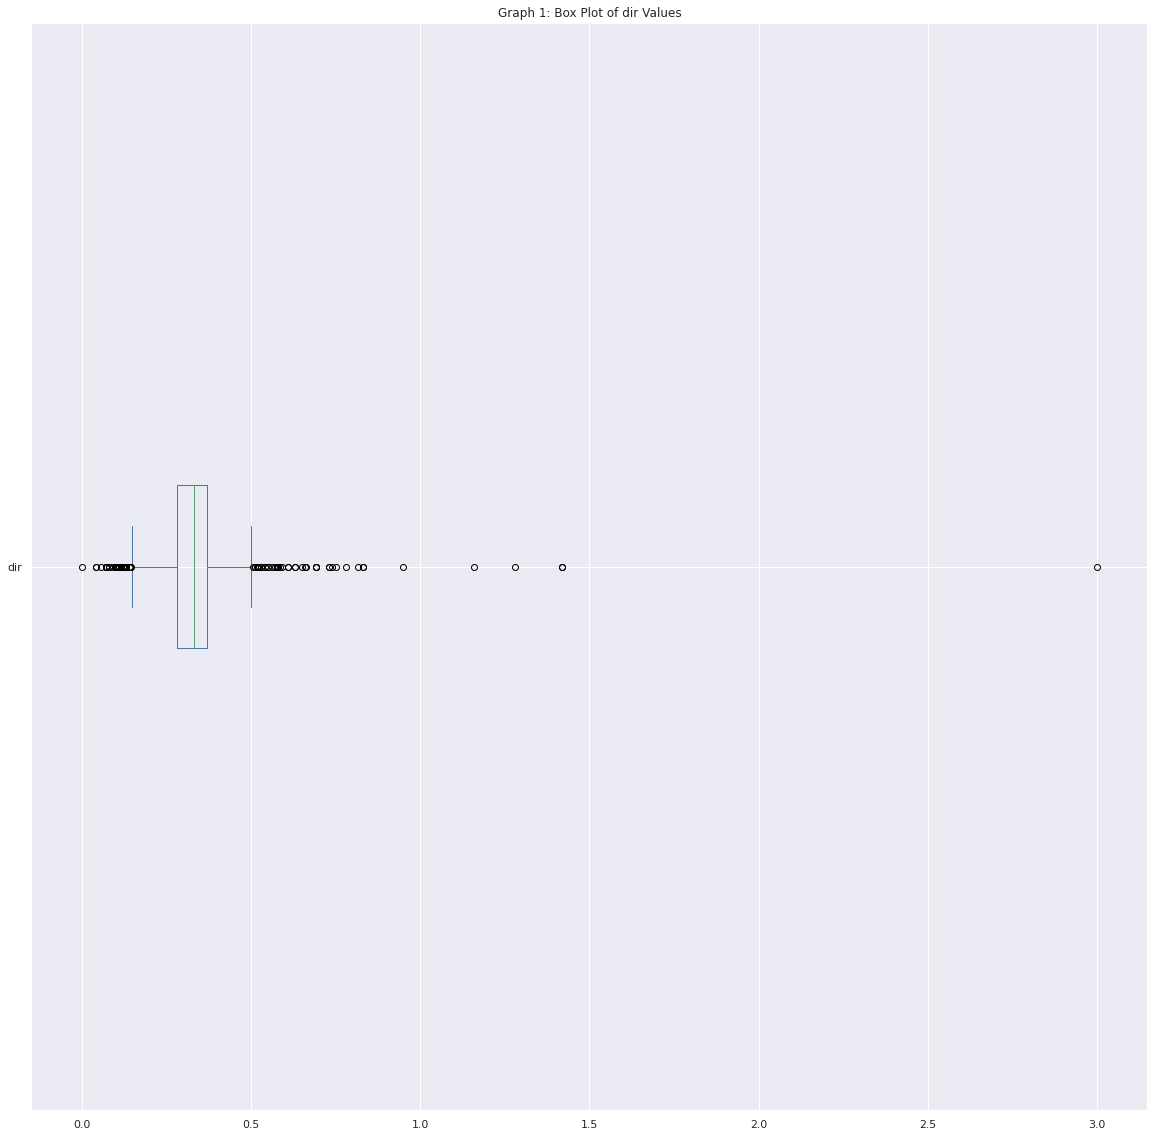

In [158]:
plt.title('Graph 1: Box Plot of dir Values')
df['dir'].plot(kind='box', vert=False);

**Discussion of Result:**
This boxplot shows us that the median of the dir values is about .3. On top of that, the scatterplot reveals there are a great deal of outliers distributed away from the mean at both ends of the graph.

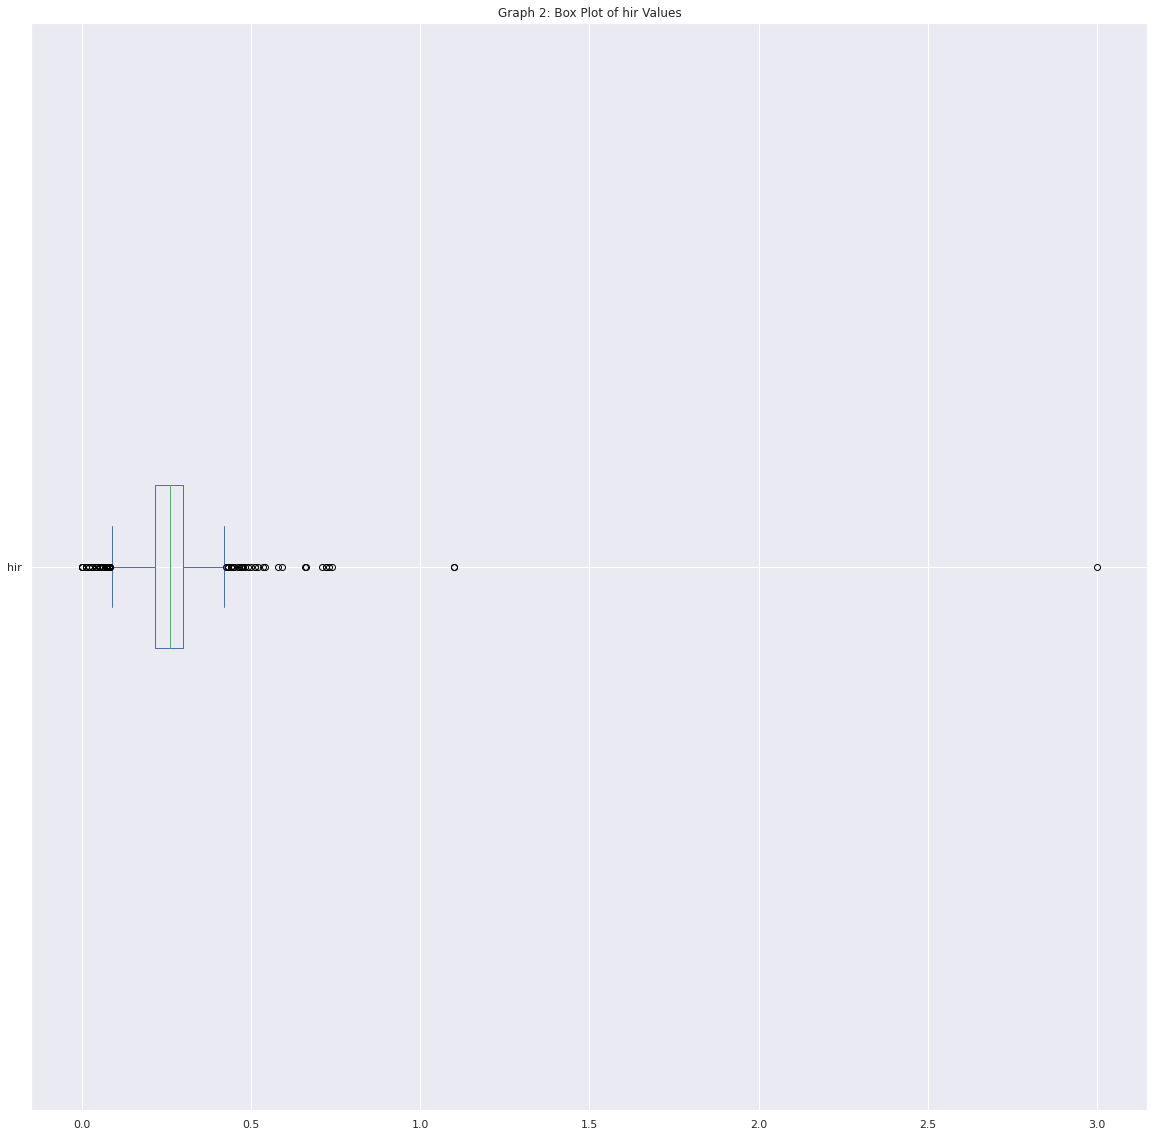

In [159]:
plt.title('Graph 2: Box Plot of hir Values')
df['hir'].plot(kind='box', vert=False);

**Discussion of Result:**
This boxplot shows us that the median of the dir values is about .25. On top of that, the scatterplot reveals there are a great deal of outliers distributed near the higher end of the graph with some concentrated near the min.

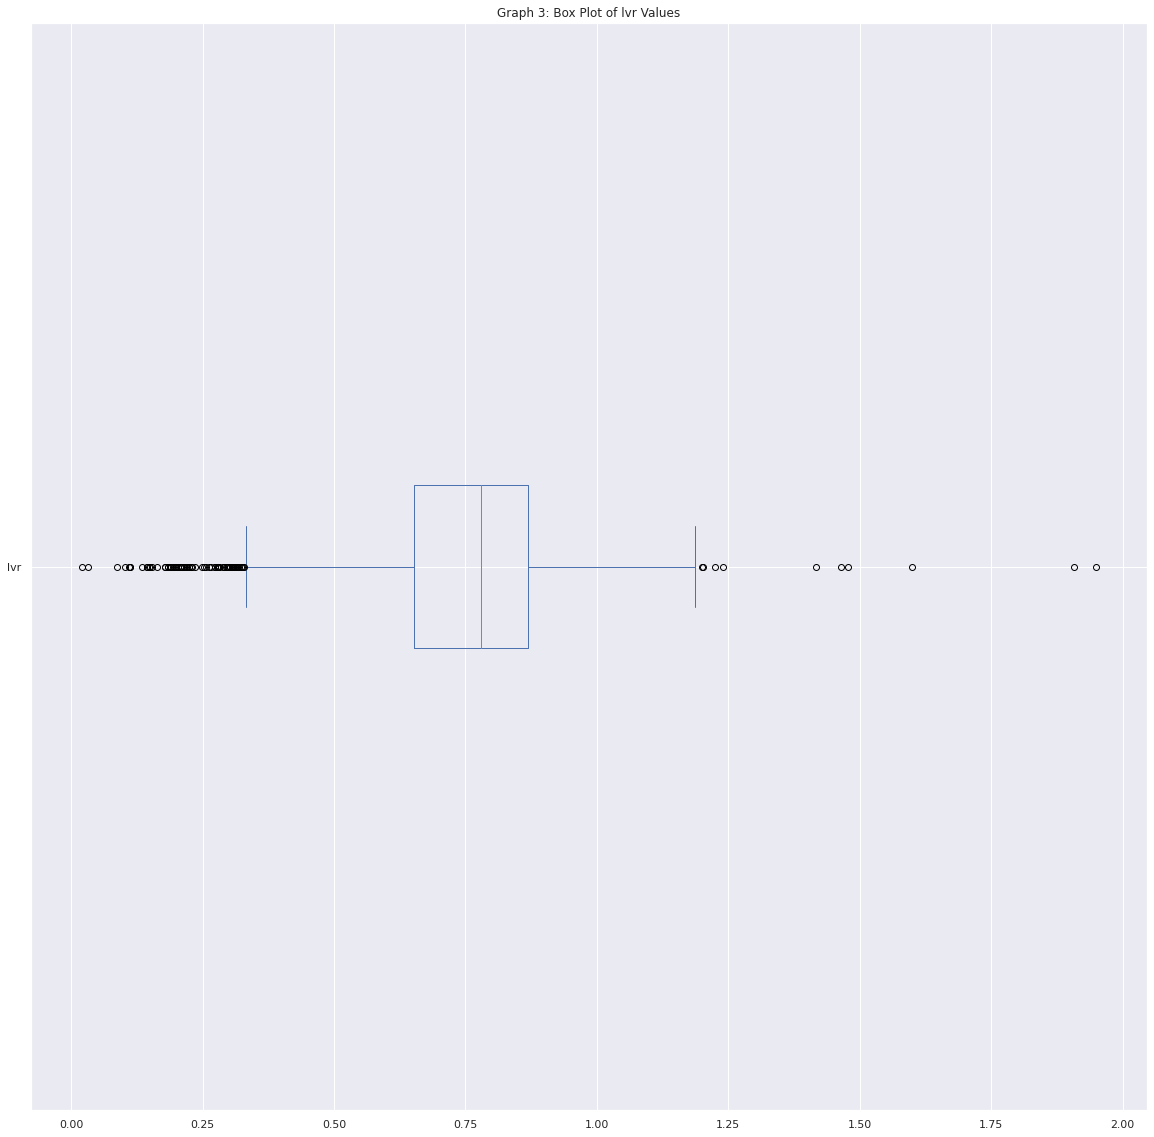

In [160]:
plt.title('Graph 3: Box Plot of lvr Values')
df['lvr'].plot(kind='box', vert=False);

**Discussion of Result:**
This boxplot shows us that the median of the lvr values is about .8. On top of that, the scatterplot reveals there are a great deal of outliers distributed near the min with some concentrated near the higher end of the graph.

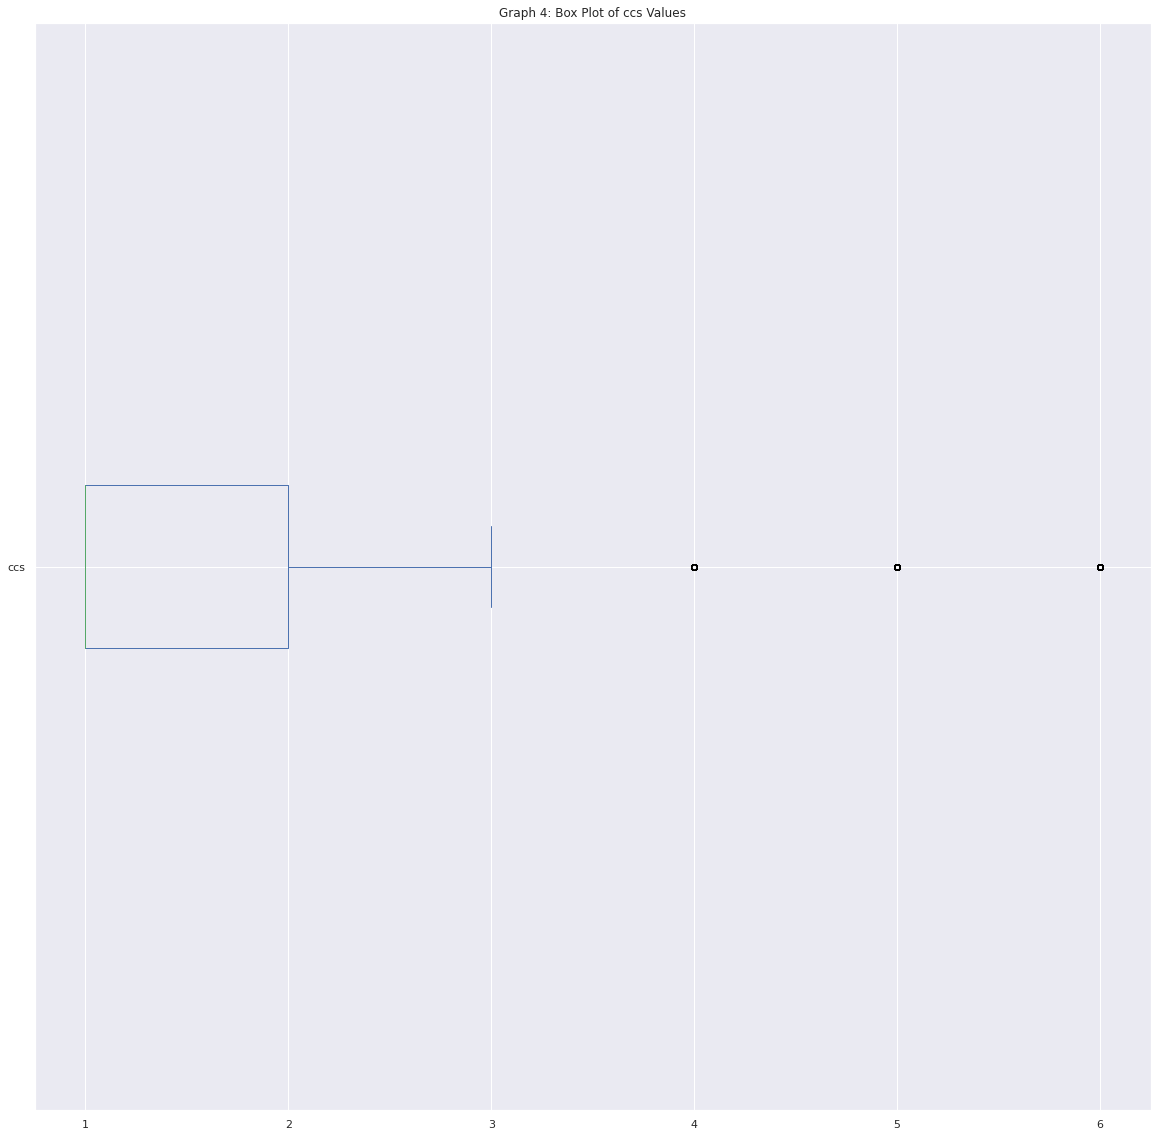

In [161]:
plt.title('Graph 4: Box Plot of ccs Values')
df['ccs'].plot(kind='box', vert=False);

**Discussion of Result:**
This boxplot shows us that the median of the ccs values is about 1. On top of that, the scatterplot reveals there are a few outliers at the higher end of the graph.

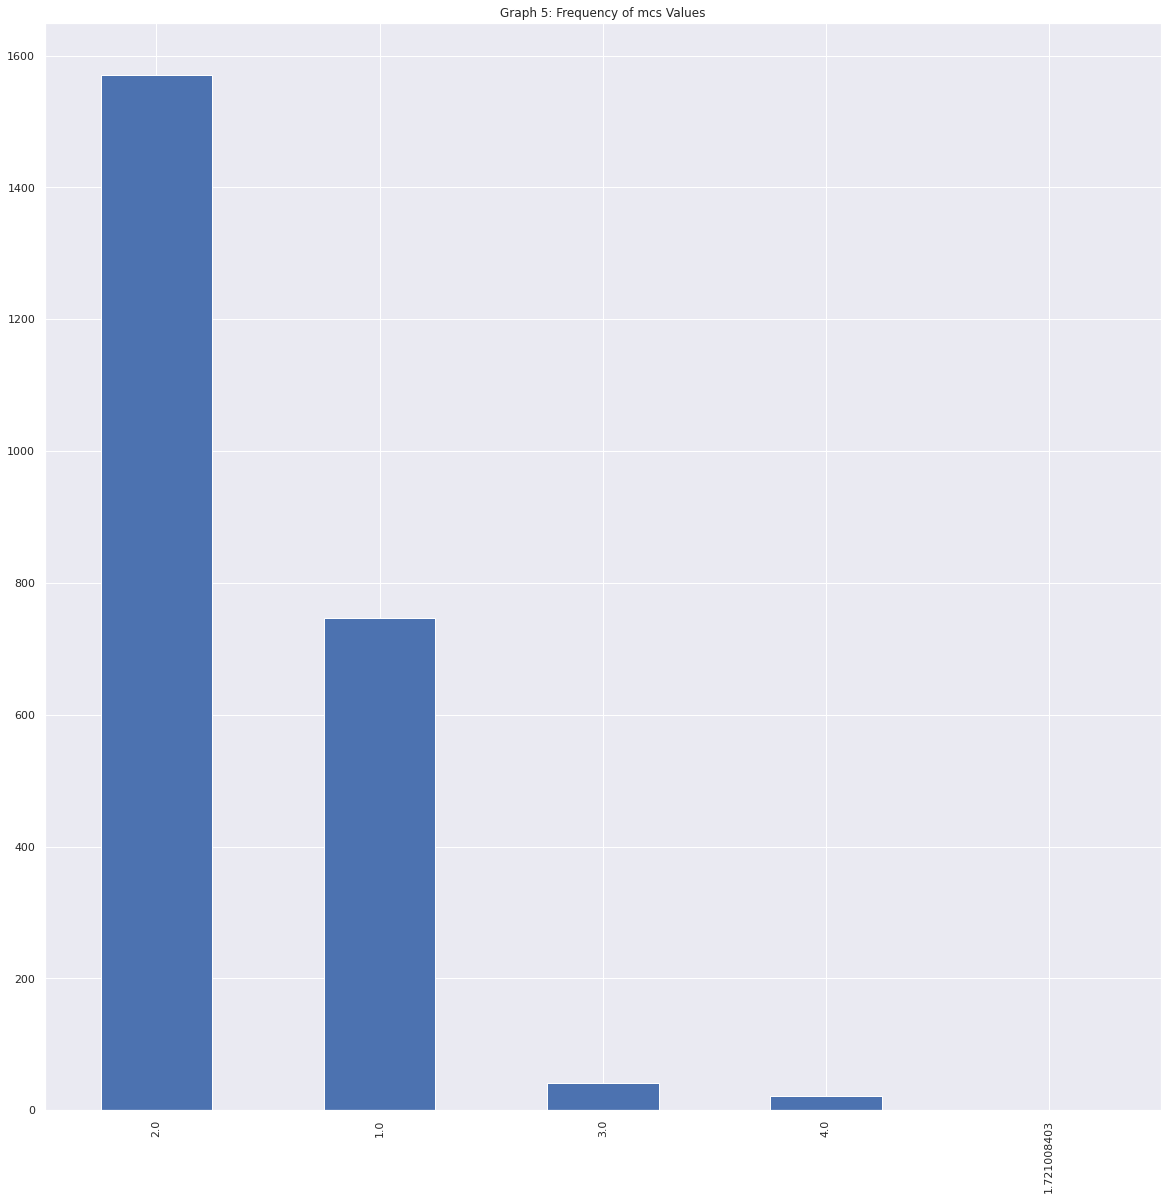

In [162]:
bplt = df['mcs'].value_counts().plot.bar(title = "Graph 5: Frequency of mcs Values")

Discussion of Result: The vast majority of applicants had a mortgage credit score of either 1 or 2.

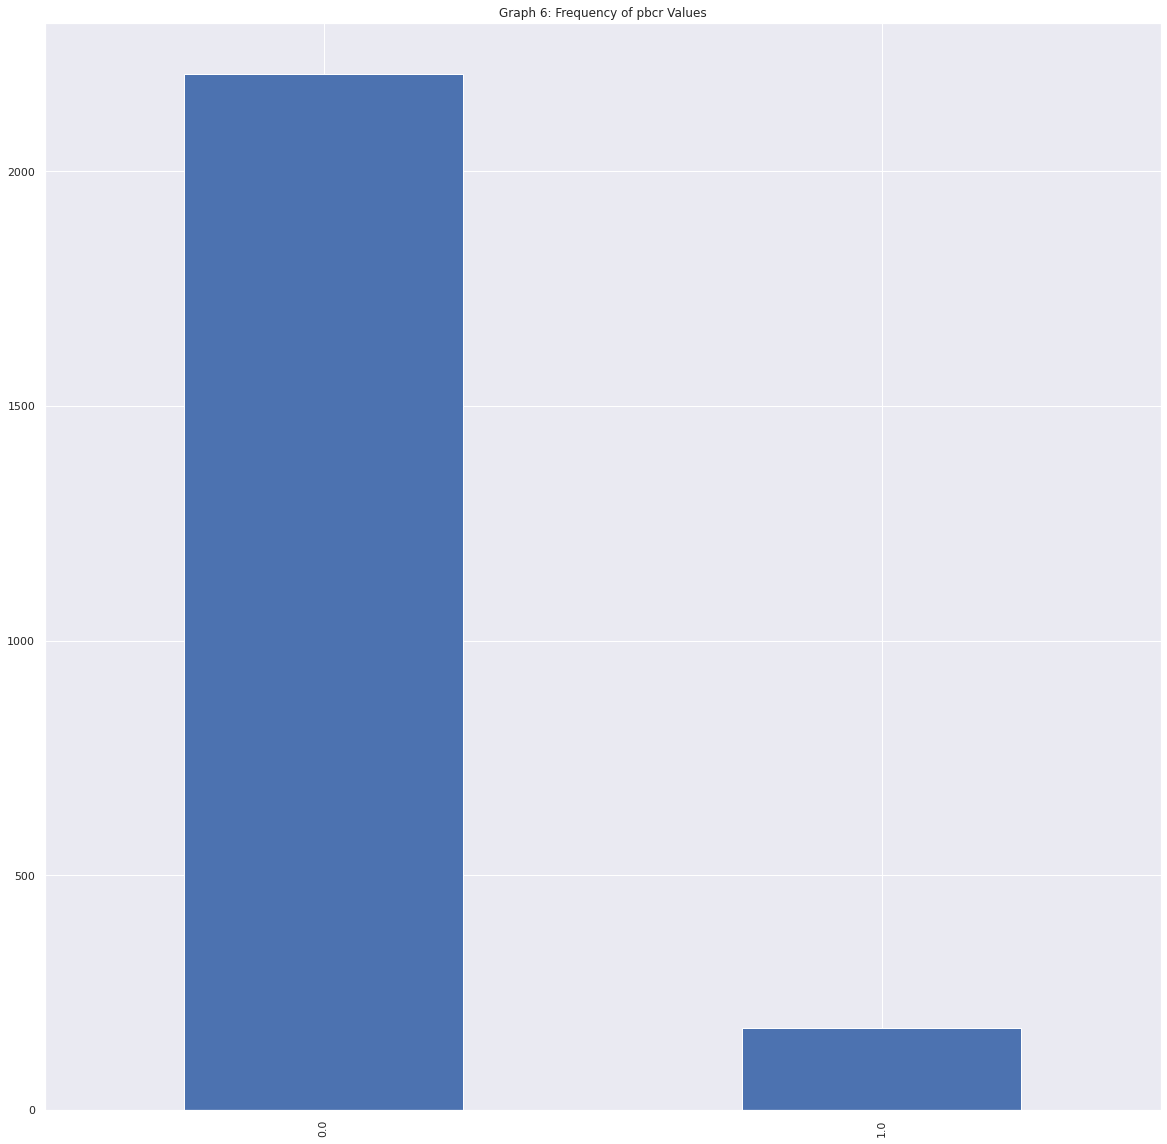

In [163]:
bplt = df['pbcr'].value_counts().plot.bar(title = "Graph 6: Frequency of pbcr Values")

Discussion of Result: This bar graph shows us that the overwhelming majority of applicants were not denied a loan.

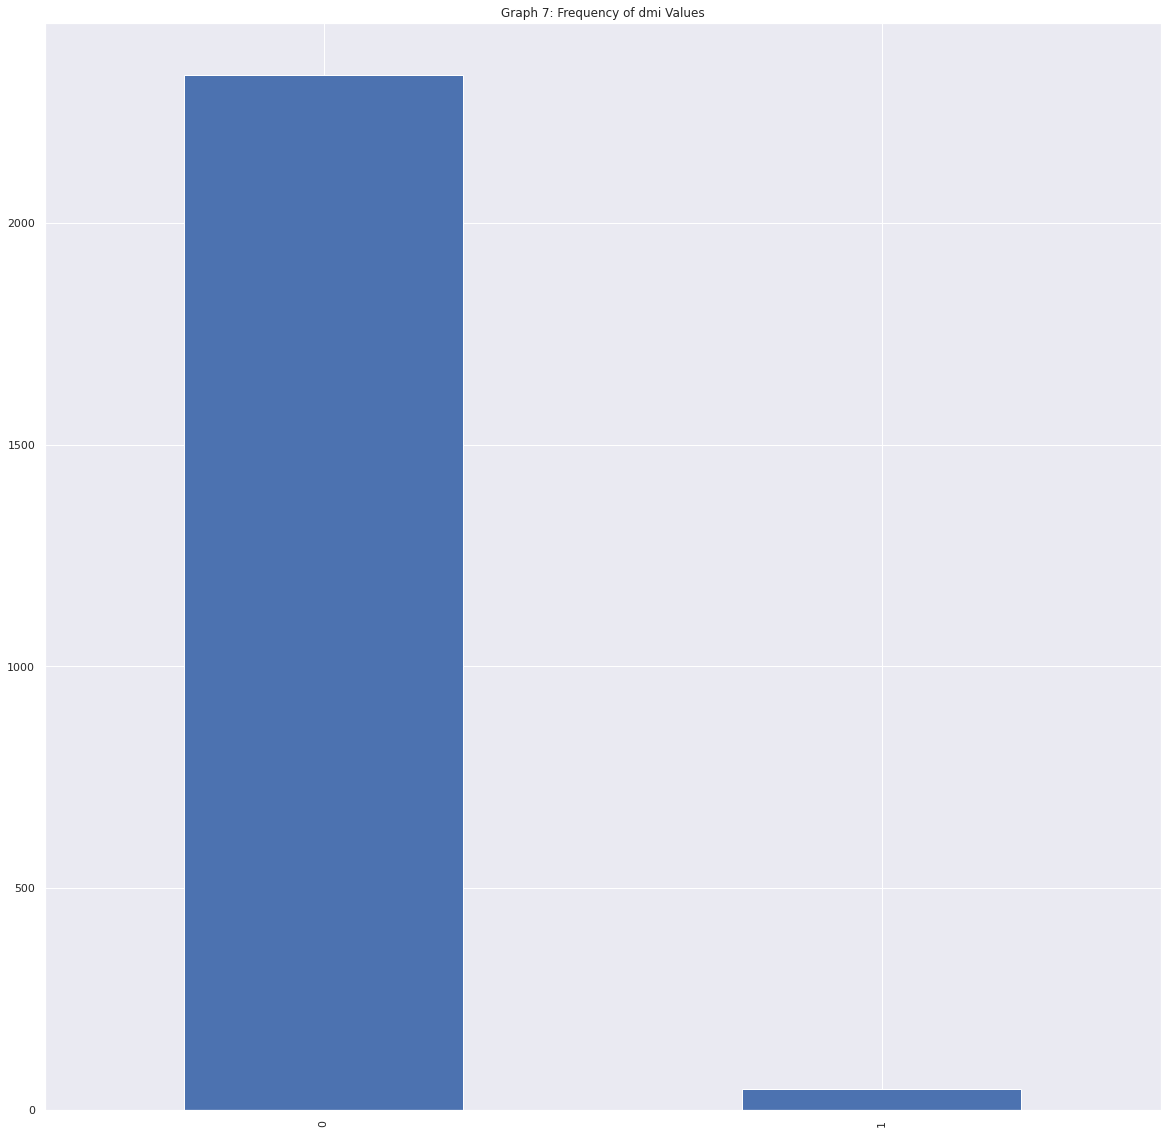

In [164]:
bplt = df['dmi'].value_counts().plot.bar(title = "Graph 7: Frequency of dmi Values")

Discussion of Result: This bar graph shows us that the overwhelming majority of applicants were not denied mortgage insurance.

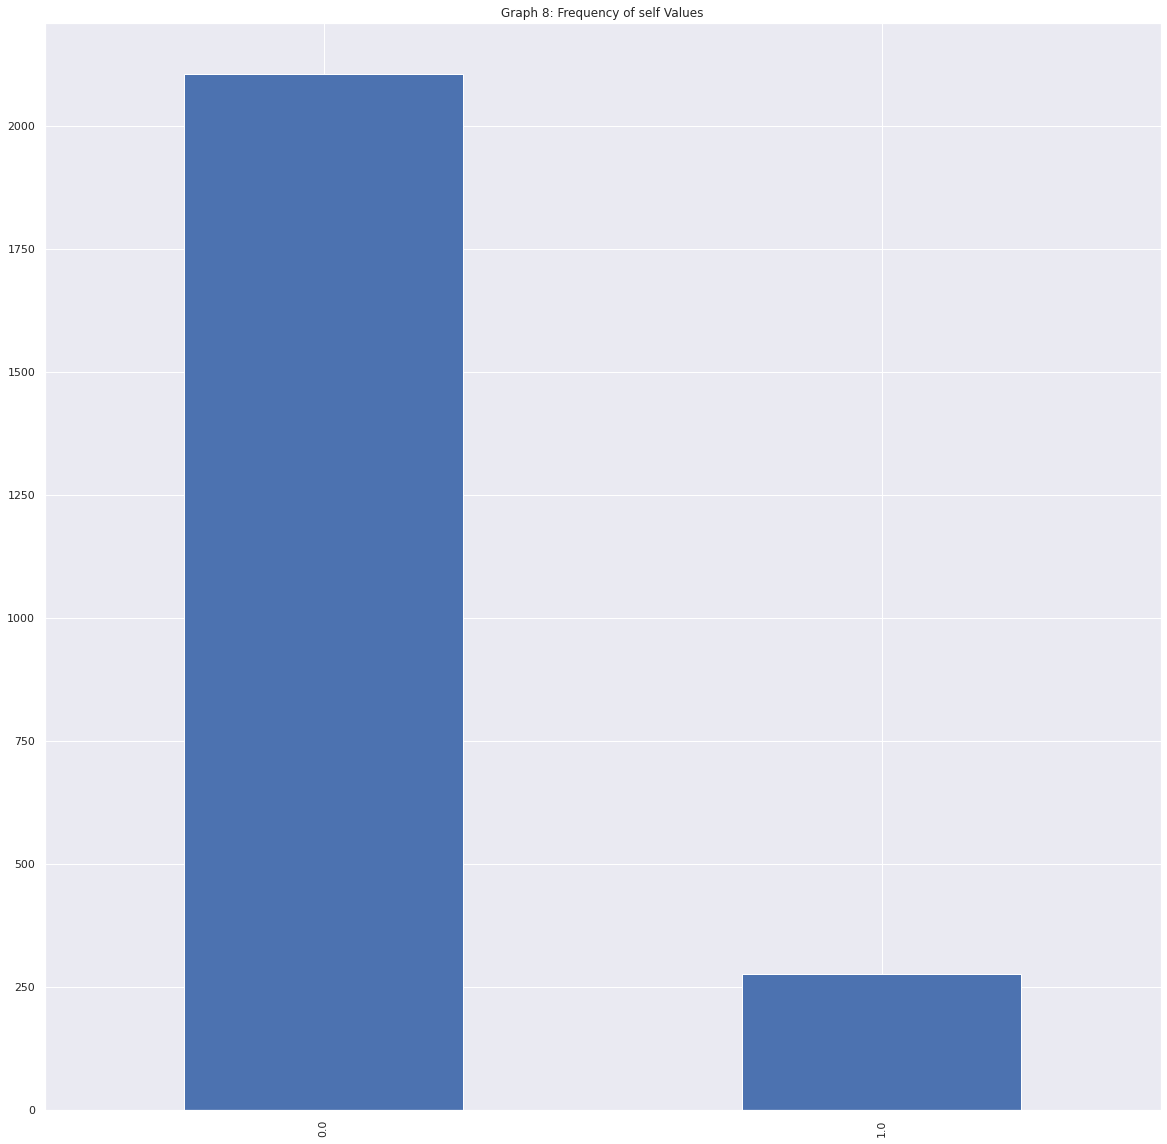

In [165]:
bplt = df['self'].value_counts().plot.bar(title = "Graph 8: Frequency of self Values")

Discussion of Result: This bar graph shows us that the overwhelming majority of applicants were not self employed.

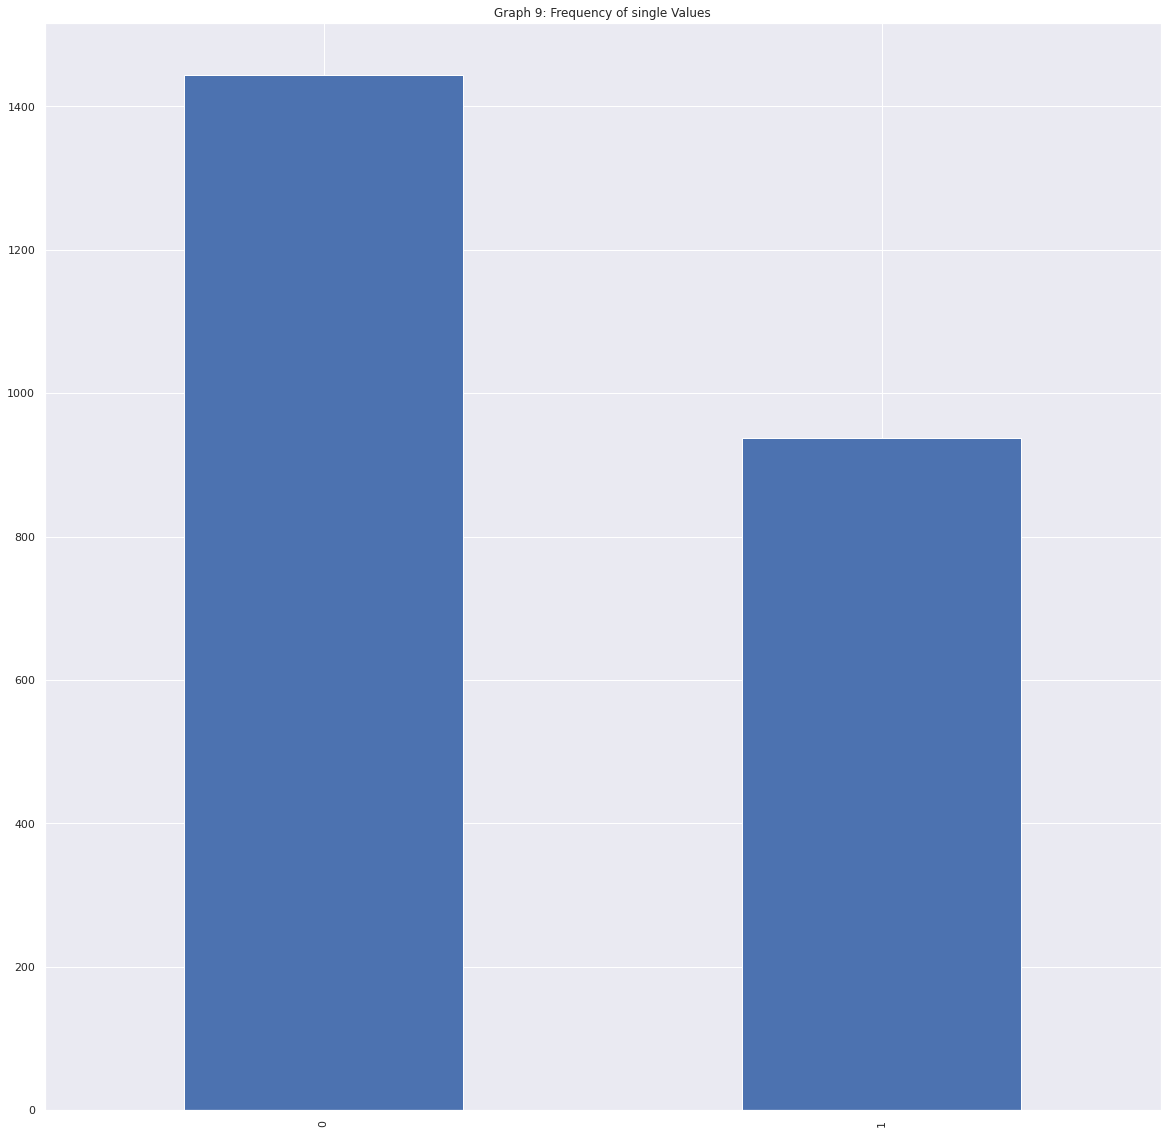

In [166]:
bplt = df['single'].value_counts().plot.bar(title = "Graph 9: Frequency of single Values")

Discussion of Result: This bar graph shows us that the majority of applicants were single.

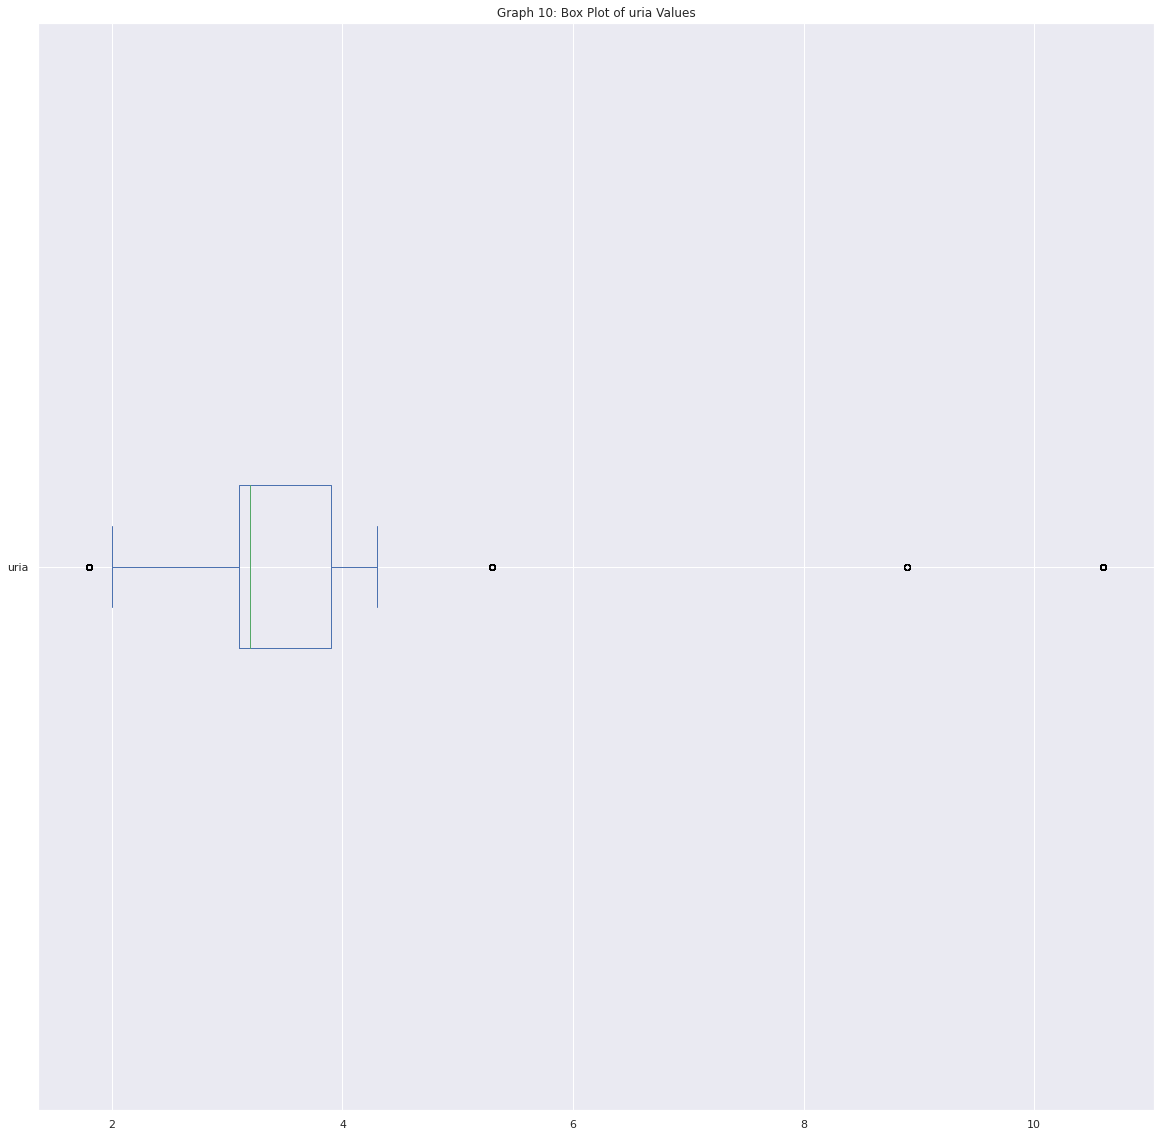

In [167]:
plt.title('Graph 10: Box Plot of uria Values')
df['uria'].plot(kind='box', vert=False);

Discussion of Result: This boxplot shows us that the median of the uria values is about 3. On top of that, the scatterplot reveals there are a few outliers at the top end of the graph and a single outlier at the low end.

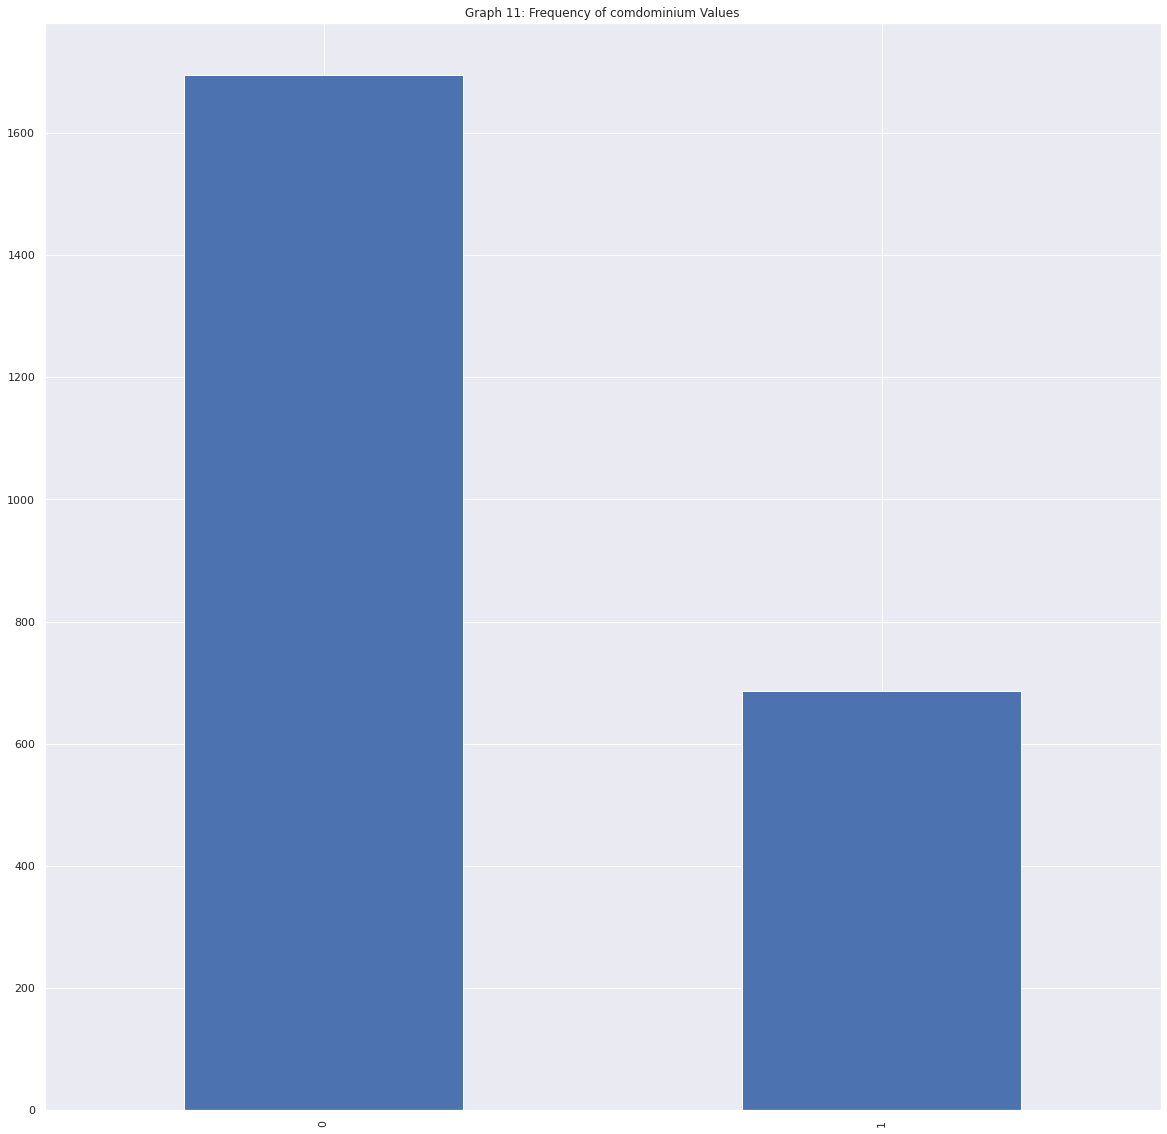

In [168]:
bplt = df['comdominiom'].value_counts().plot.bar(title = "Graph 11: Frequency of comdominium Values")

Discussion of Result: This bar graph shows us that the majority of applicants did not own a comdominium.

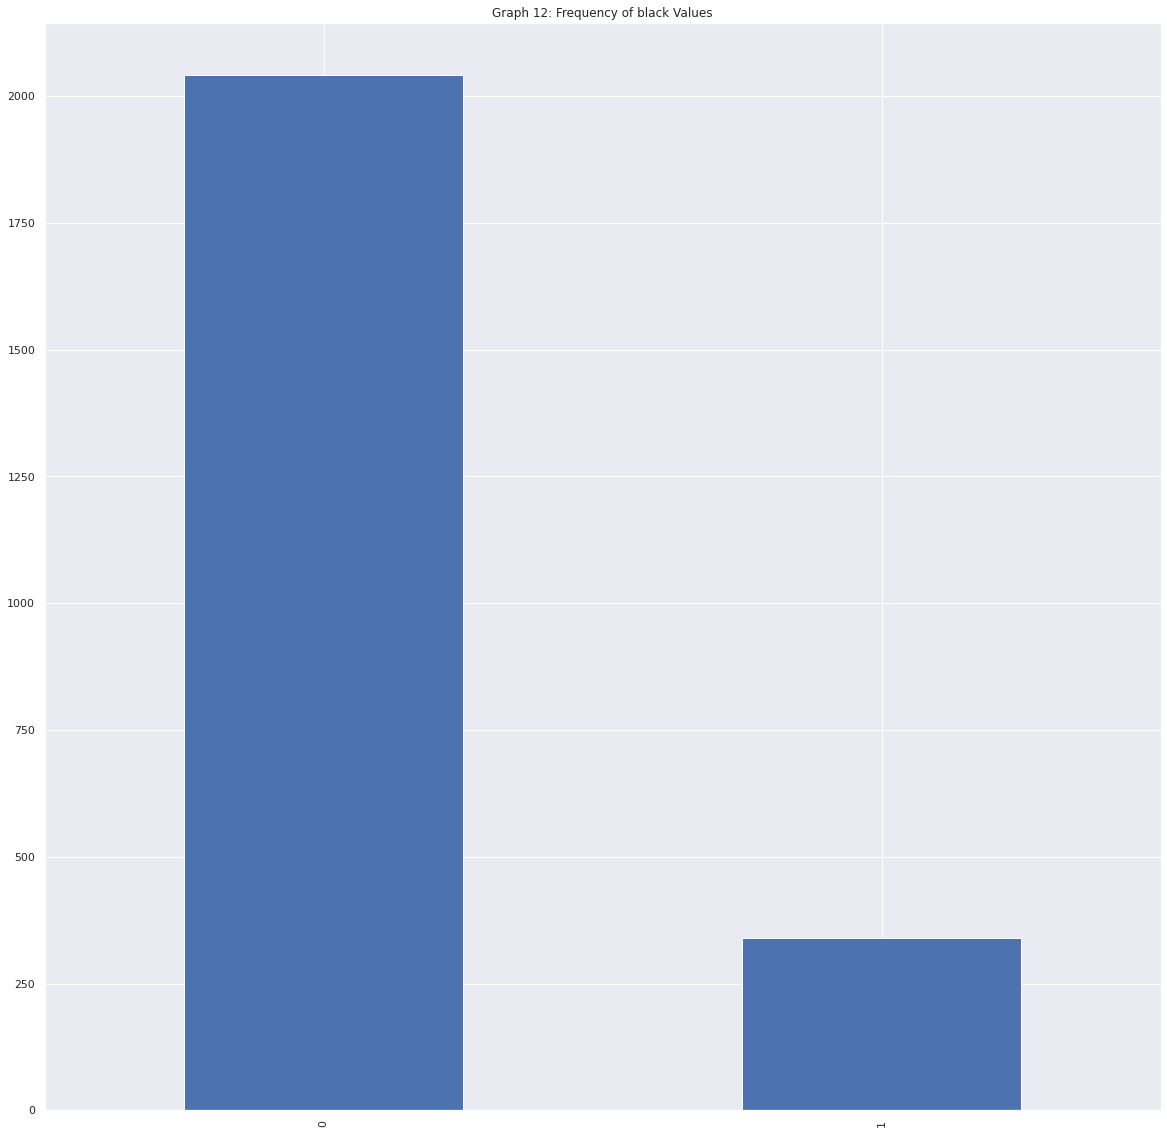

In [169]:
bplt = df['black'].value_counts().plot.bar(title = "Graph 12: Frequency of black Values")

Discussion of Result: This bar graph shows us that the vast majority of applicants were not black.

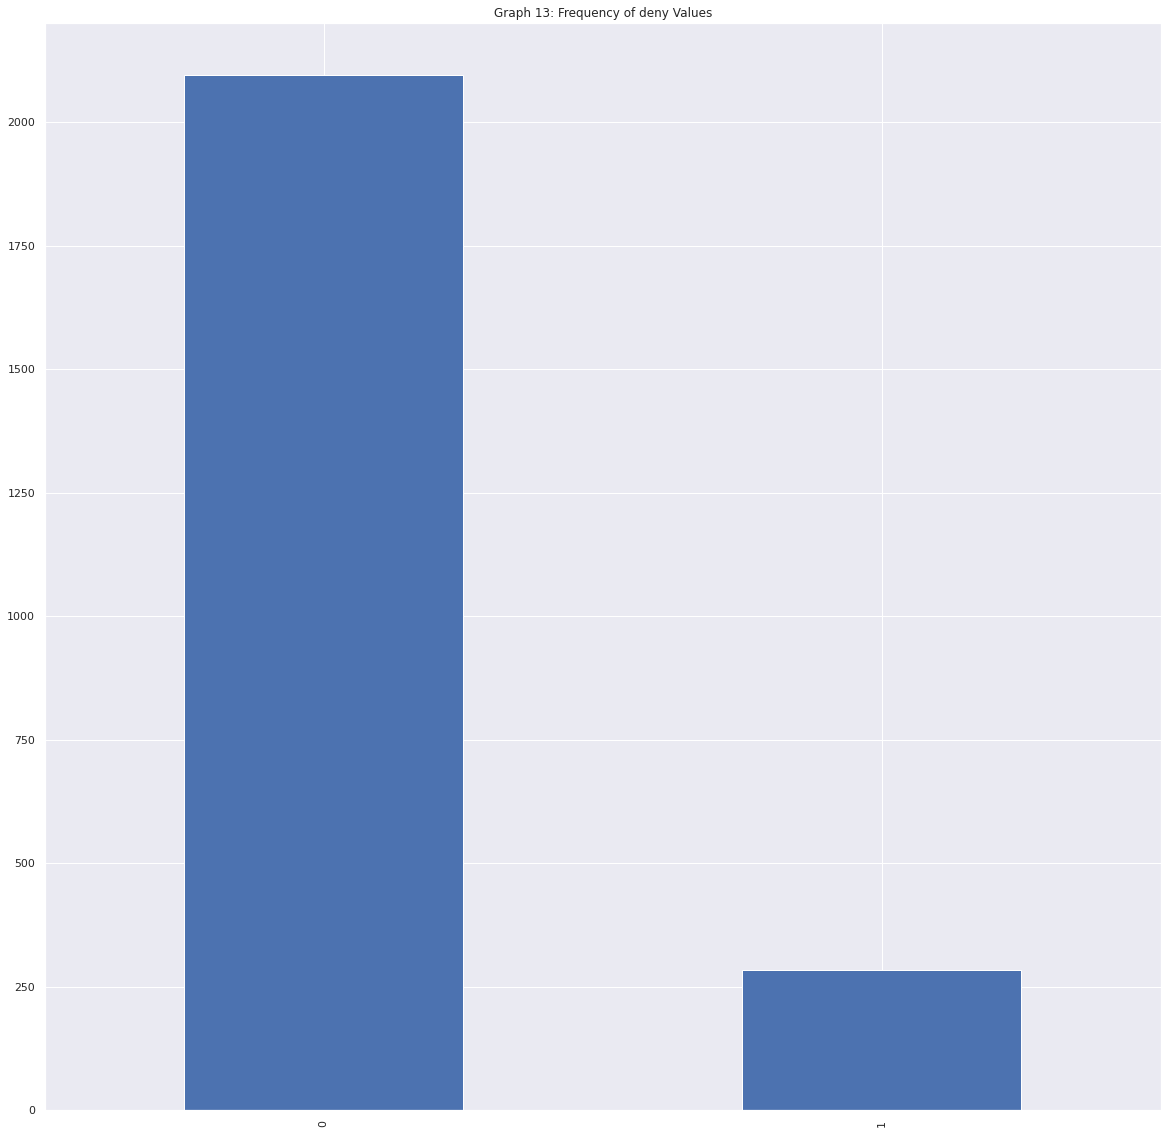

In [170]:
bplt = df['deny'].value_counts().plot.bar(title = "Graph 13: Frequency of deny Values")

Discussion of Result: This bar graph shows us that the vast majority of applicants were not denied for a loan.

In [171]:
#Display numerical representation of correlation between numerical attributes
df.corr()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
dir,1.000000,0.781473,0.150653,0.065234,0.051318,0.102299,0.044257,0.036140,0.031035,0.046450,-0.012451,0.076675,0.199337
hir,0.781473,1.000000,0.126273,0.005277,0.104721,0.056444,0.020147,-0.014238,0.059809,0.036992,-0.046039,0.046053,0.133072
lvr,0.150653,0.126273,1.000000,0.111939,0.186326,0.100911,0.120989,-0.056628,0.045129,-0.034643,0.055001,0.162104,0.162249
ccs,0.065234,0.005277,0.111939,1.000000,0.152686,0.287527,0.050964,-0.015913,0.013965,-0.006424,0.050742,0.221150,0.262361
mcs,0.051318,0.104721,0.186326,0.152686,1.000000,0.056410,0.046692,-0.065169,0.166697,0.037077,0.090462,0.119906,0.109646
pbcr,0.102299,0.056444,0.100911,0.287527,0.056410,1.000000,0.085566,0.028315,0.000434,0.011171,0.030491,0.161592,0.272961
dmi,0.044257,0.020147,0.120989,0.050964,0.046692,0.085566,1.000000,-0.014765,0.019026,0.013014,-0.005473,0.086936,0.352165
self,0.036140,-0.014238,-0.056628,-0.015913,-0.065169,0.028315,-0.014765,1.000000,-0.024154,0.142008,-0.031259,-0.054124,0.051829
single,0.031035,0.059809,0.045129,0.013965,0.166697,0.000434,0.019026,-0.024154,1.000000,-0.046387,0.298099,0.102328,0.076389
uria,0.046450,0.036992,-0.034643,-0.006424,0.037077,0.011171,0.013014,0.142008,-0.046387,1.000000,-0.100647,-0.066231,0.043593


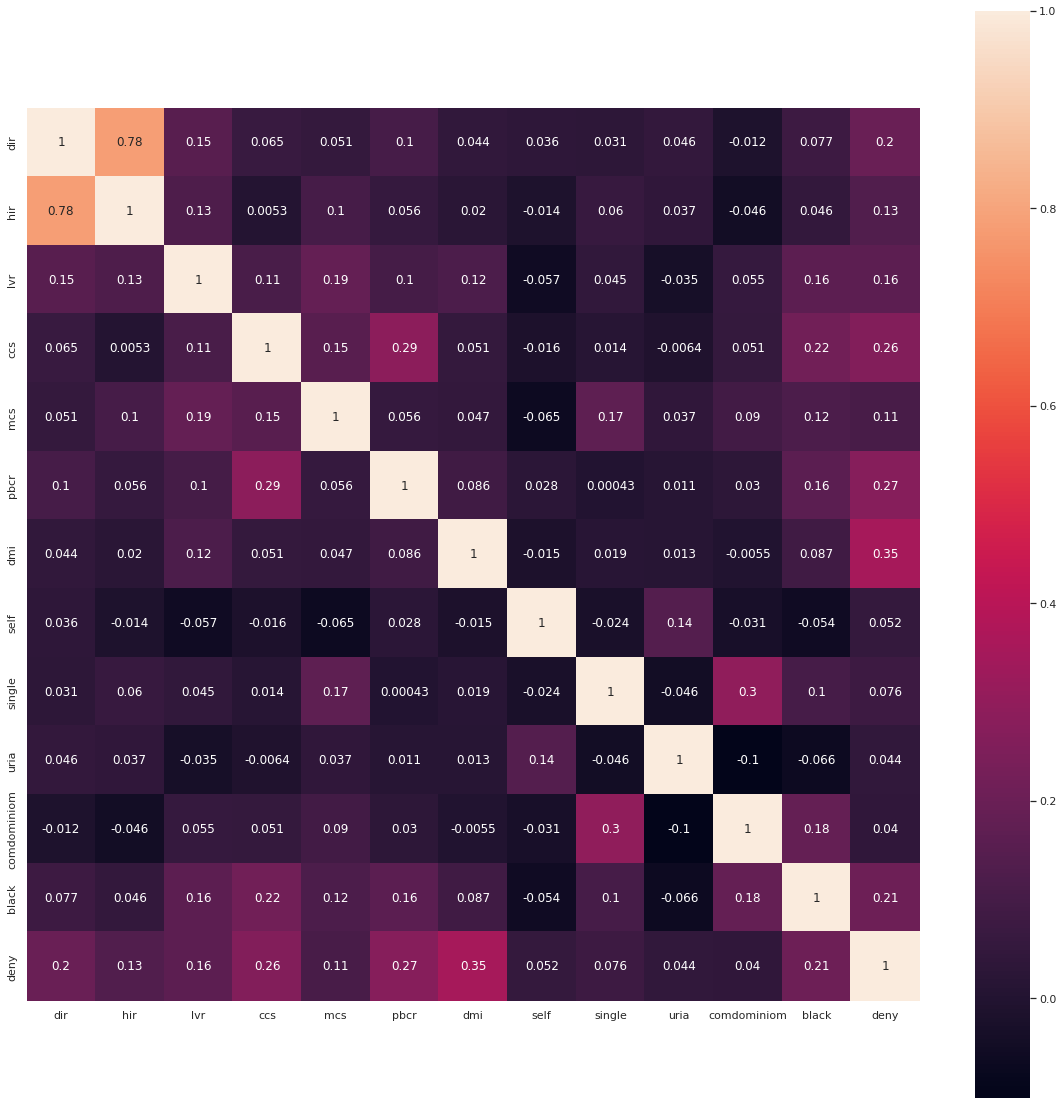

In [172]:
# Correlation Map of numerical data
corr = df.corr()
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

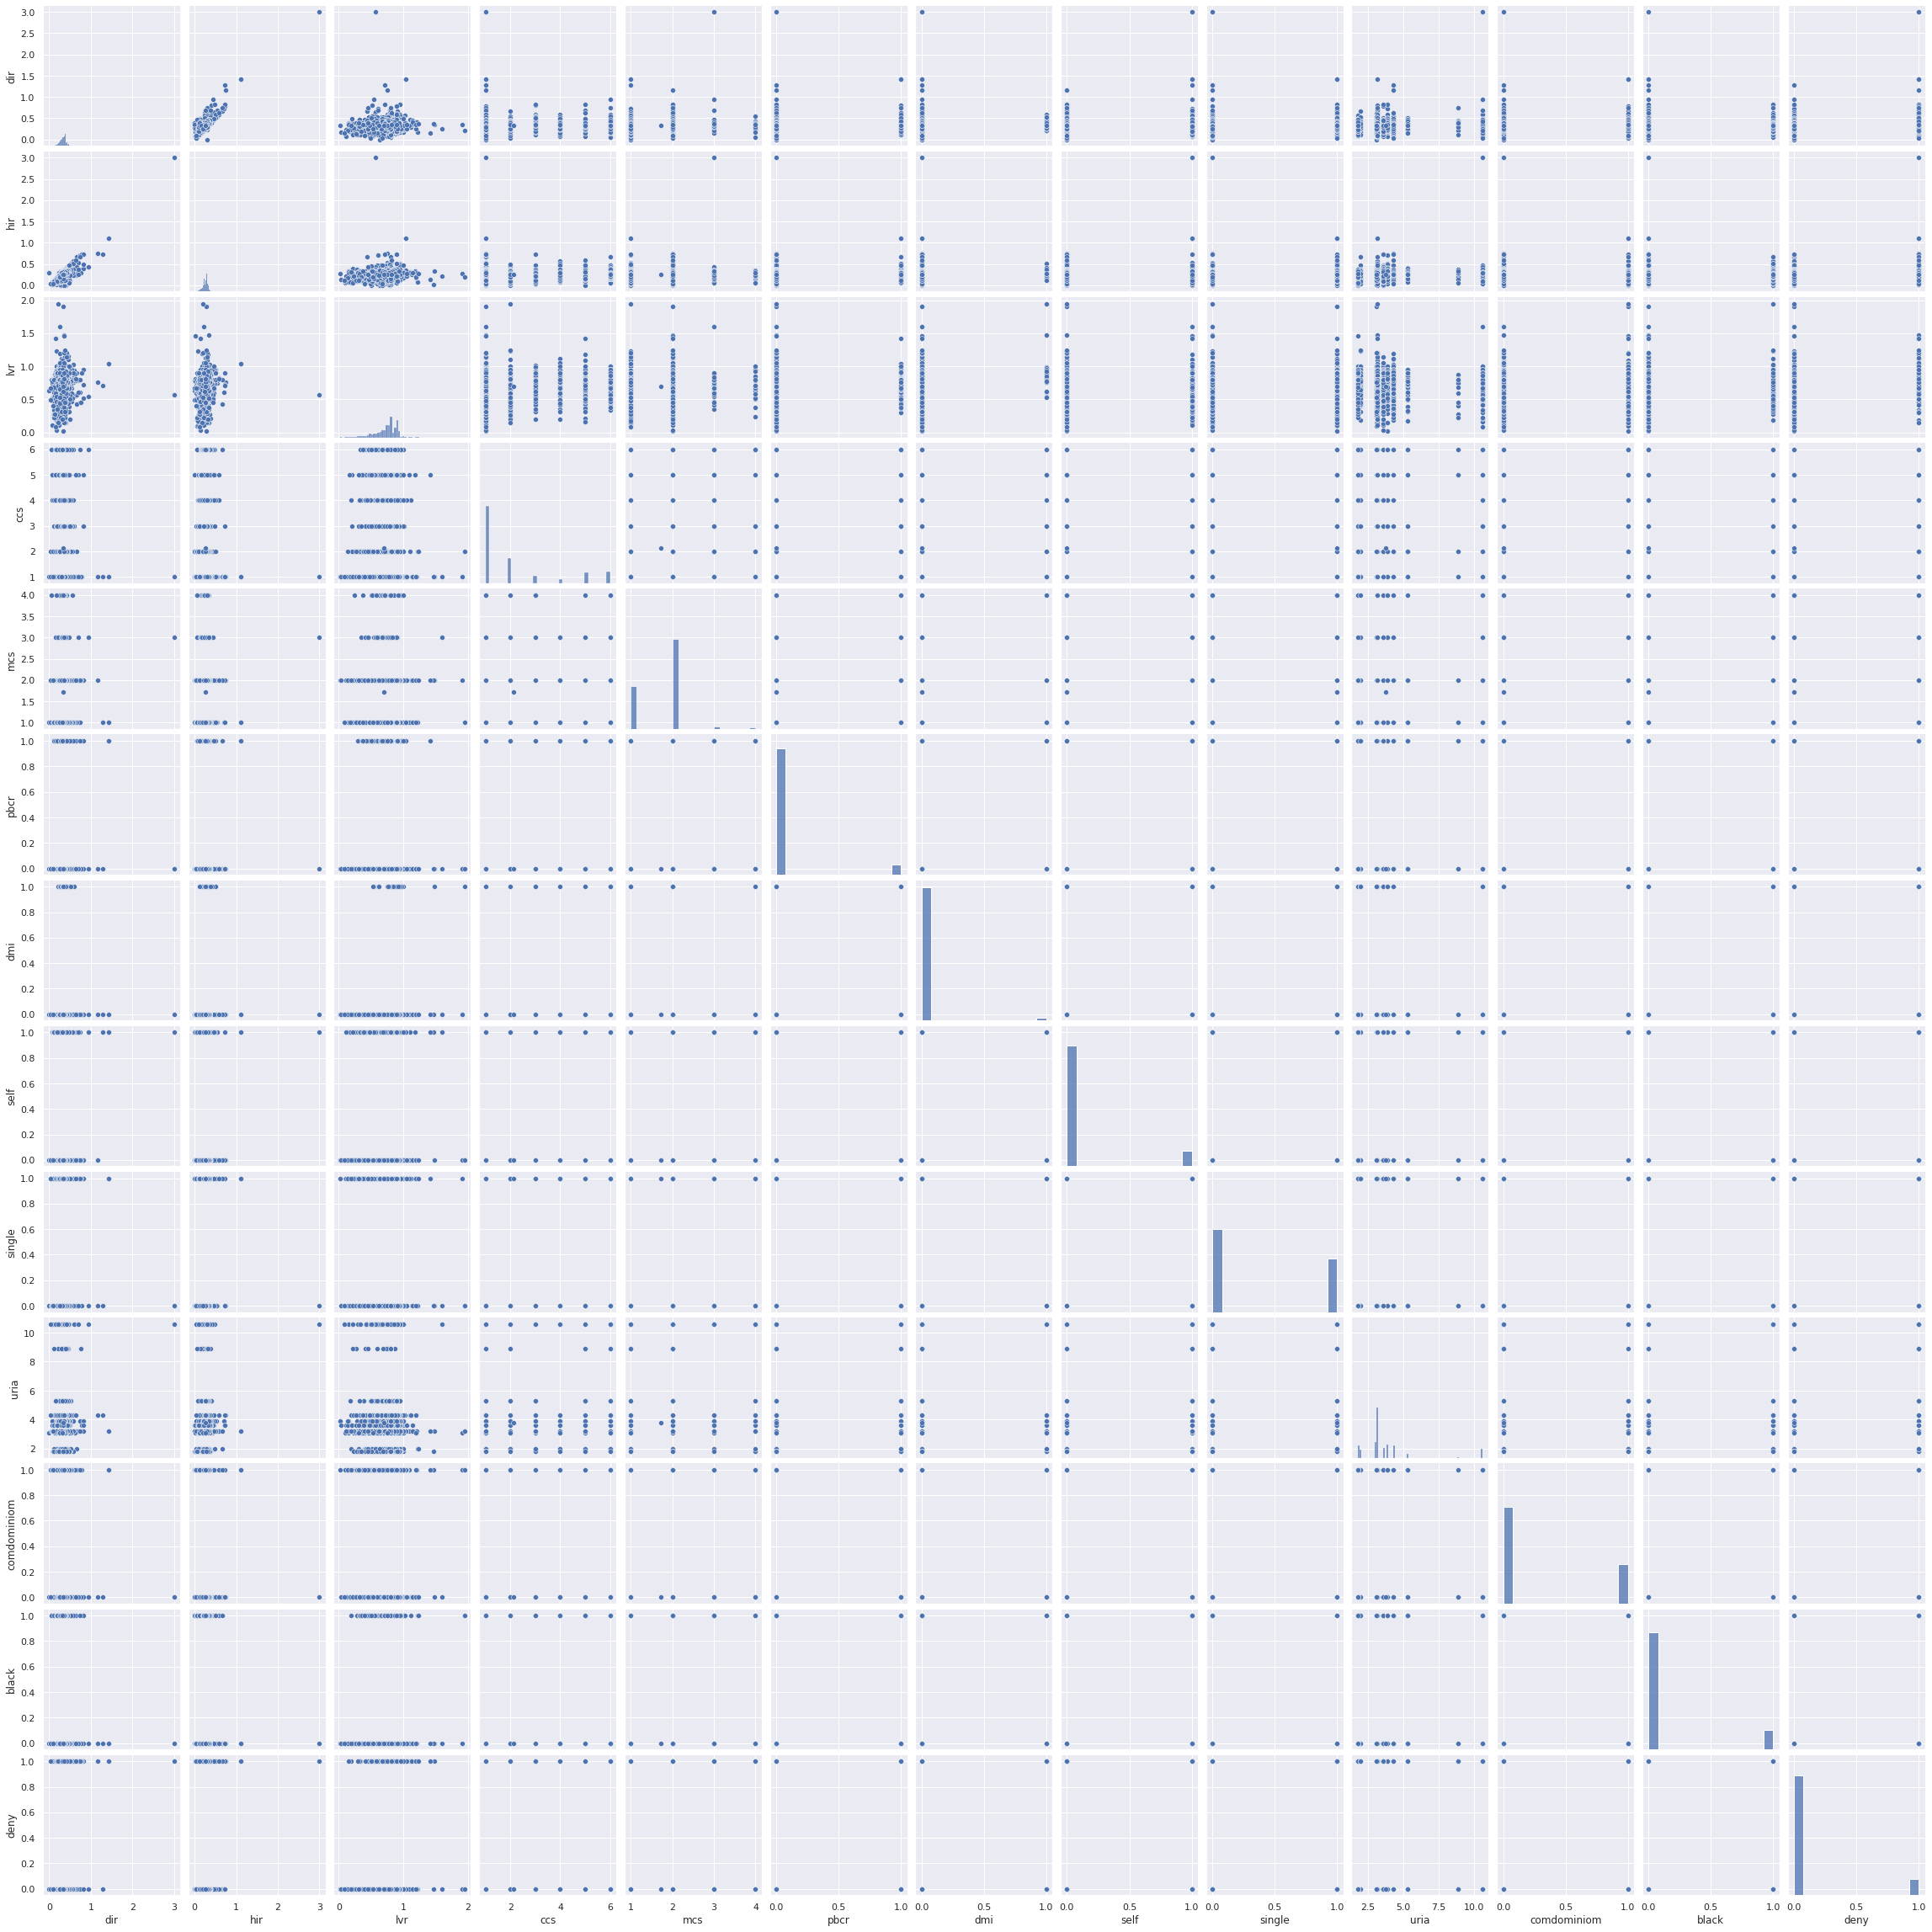

In [173]:
#Display graphical representation of correlation between numerical attributes
sns.pairplot(data=df)

### **Preliminary Conclusion**
Judging from the generated graphs of the pair plot and the heat map, I predict that there will only be a few of the attributes that have a discernable effect on the deny attribute. I say this for 2 reasons. The deny attribute has a .36 correlation rating with dmi. The next highest correlation with deny is pbcr with a rating of .27. Both of these ratings are low and the others are far lower than that. I also suspect that dir will be dropped as a necessary attribute during feature selection because it has a high degree of correlation with the hir, black and ccs attributes. This means dir is not likely to add any meaningful data. I also believe self will be dropped as an attribute during feature selection since it has a negative correlation with multiple attributes. I predict the dmi and pbcr will be the 2 highest prioritized attributes due to theri relatively correlation ratings.

## **Part 5: Feature Selection**
In this section. I will use K-best to develop one model. I will also use the 5 attributes with the highest correlation with deny to form another model. I will test the 3 models against each other and see which one is the most accurate.

In [174]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

target = df['deny']
features = df.drop('deny',axis=1).copy()
feature_names = list(features.columns)

selection_kBest = SelectKBest(f_regression,k = 5).fit(features,target)

#find which columns were chosen
features_kbest = selection_kBest.get_support()
print("Overall features: ", df.columns,'\n')
print("Chosen features: ", features.columns[features_kbest],'\n')

selection_kBest.scores_

Overall features:  Index(['dir', 'hir', 'lvr', 'ccs', 'mcs', 'pbcr', 'dmi', 'self', 'single',
       'uria', 'comdominiom', 'black', 'deny'],
      dtype='object') 

Chosen features:  Index(['dir', 'ccs', 'pbcr', 'dmi', 'black'], dtype='object') 



array([ 98.44180896,  42.88743288,  64.31953539, 175.85967302,
        28.94913233, 191.52316913, 336.81573745,   6.40773209,
        13.96378611,   4.52958742,   3.75069692, 104.58732528])

## **Part 6.1 - Logostic Regression Model from Original Data**

In [179]:
#Form model from all of the attributes in the original dataframe
y, X = dmatrices('deny ~ dir + hir + lvr + ccs + C(mcs) + C(pbcr) + C(dmi) + C(self) + C(single) + uria + C(comdominiom) + C(black)', df, return_type="dataframe")
y = np.ravel(y)
np.warnings.filterwarnings('ignore')
model1 = LogisticRegression()
model1 = model1.fit(X, y)
model1.score(X, y) #Score of model1

0.9042419151616967

In [176]:
y.mean() #Percentage of applicants denied

0.11969760604787905

In [180]:
#SPlit data into test data and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [181]:
#Use model to make preictions of denial
predicted = model1.predict(X_test)
probs = model1.predict_proba(X_test)
dt = pd.DataFrame(probs)
dt['predictions1'] = predicted

filtered_dt = dt[dt['predictions1'] == 1]
filtered_dt

,0,1,predictions1
7,0.334370,0.665630,1.0
8,0.283621,0.716379,1.0
126,0.414494,0.585506,1.0
135,0.187136,0.812864,1.0
156,0.288343,0.711657,1.0
174,0.012529,0.987471,1.0
177,0.181803,0.818197,1.0
194,0.379775,0.620225,1.0
227,0.030511,0.969489,1.0
236,0.314003,0.685997,1.0


In [184]:
print(metrics.accuracy_score(y_test, predicted)) #Accuracy Rating
print(metrics.roc_auc_score(y_test, probs[:, 1])) #ROC Rating

0.9182389937106918
0.8533554266777134


In [194]:
print(metrics.confusion_matrix(y_test, predicted)) #Confusion Matrix

[[421   5]
 [ 34  17]]


In [191]:
print(metrics.classification_report(y_test, predicted)) #Classification Report

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       426
         1.0       0.77      0.33      0.47        51

    accuracy                           0.92       477
   macro avg       0.85      0.66      0.71       477
weighted avg       0.91      0.92      0.90       477

